In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from keras.optimizers import Adam
import seaborn as sns
from scipy.optimize import minimize
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [ ]:
selected_tickers = ['NOW', 'IBM', 'BABA', 'NFLX', 'CSCO', 'META', 'ADBE', '0700.HK', 'ACN', 'AAPL']


start_date = '2020-01-01'


end_date = datetime.now().strftime('%Y-%m-%d')


stock_data = {}
for symbol in selected_tickers:
    try:
        stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)
        print(f"Data successfully retrieved for {symbol}.")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

for symbol, data in stock_data.items():
    print(f"Stock Symbol: {symbol}")
    print(data.tail(2))
    print()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for NOW.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for IBM.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for BABA.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for NFLX.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for CSCO.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for META.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for ADBE.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for 0700.HK.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for ACN.


[*********************100%***********************]  1 of 1 completed


Data successfully retrieved for AAPL.
Stock Symbol: NOW
Price            Close       High         Low        Open   Volume
Ticker             NOW        NOW         NOW         NOW      NOW
Date                                                              
2025-03-25  861.380005  870.98999  855.000000  858.229980  1643200
2025-03-26  838.549988  860.51001  834.030029  856.340027  1349800

Stock Symbol: IBM
Price            Close        High         Low        Open   Volume
Ticker             IBM         IBM         IBM         IBM      IBM
Date                                                               
2025-03-25  249.899994  250.899994  248.199997  248.360001  3133800
2025-03-26  250.339996  254.320007  249.529999  251.250000  4452200

Stock Symbol: BABA
Price            Close        High         Low        Open    Volume
Ticker            BABA        BABA        BABA        BABA      BABA
Date                                                                
2025-03-25  132.750000 

In [45]:
close_prices = pd.concat([data['Close'] for data in stock_data.values()], axis=1)
close_prices.columns = selected_tickers

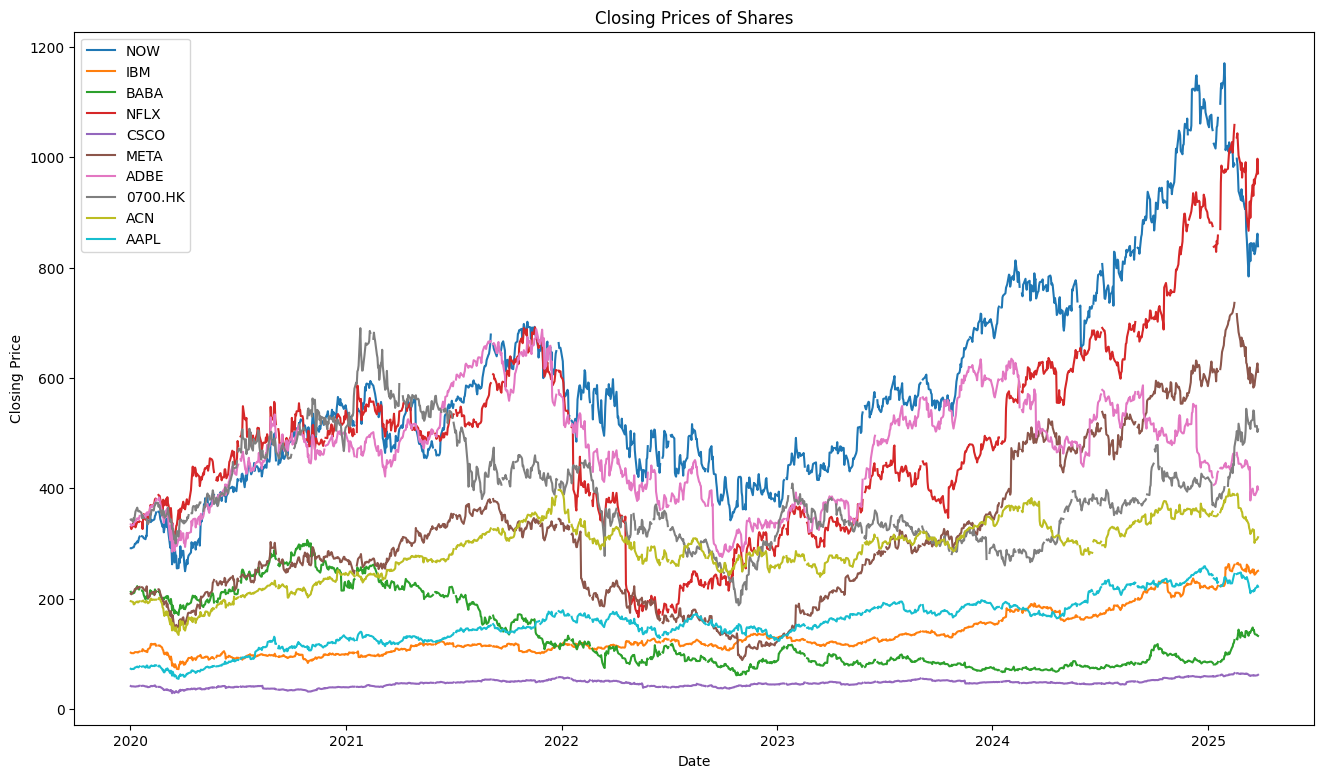

In [ ]:
plt.figure(figsize=(16, 9))
for column in close_prices.columns:
    plt.plot(close_prices.index, close_prices[column], label=column)
plt.title("Closing Prices of Shares")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

<ipython-input-56-90710b86b783>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_tickers, y=weights.flatten(), palette="Blues_d")


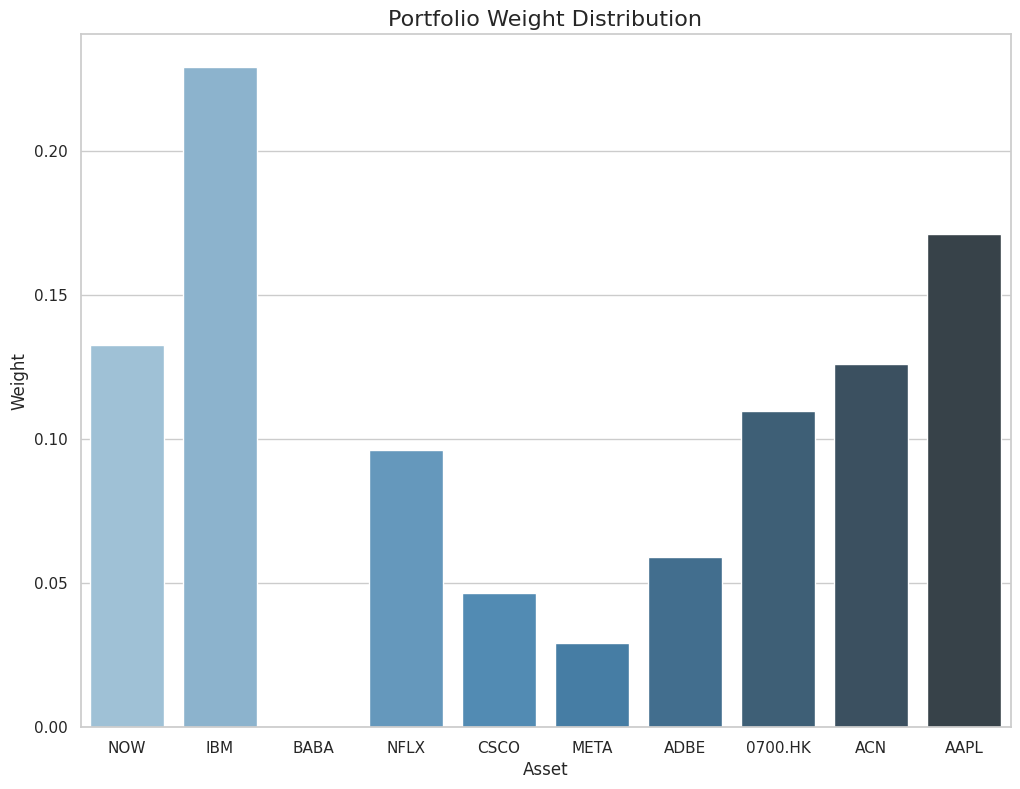


Expected return of the portfolio is : 12.112193808088985

Volatility of the portfolio: 0.19755621117057495

Sharpe ratio of the portfolio: 0.6131011389781623


In [56]:
np.random.seed(1)
weights = np.random.random((10, 1))
weights /= np.sum(weights)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 9))
sns.barplot(x=selected_tickers, y=weights.flatten(), palette="Blues_d")
plt.title('Portfolio Weight Distribution', fontsize=16)
plt.ylabel('Weight', fontsize=12)
plt.xlabel('Asset', fontsize=12)
plt.show()

log_ret = np.log(close_prices / close_prices.shift(1))
log_ret

exp_ret = log_ret.mean().dot(weights)*182
print(f'\nExpected return of the portfolio is : {exp_ret[0]*100}')


exp_vol = np.sqrt(weights.T.dot(182*log_ret.cov().dot(weights)))
print(f'\nVolatility of the portfolio: {exp_vol[0][0]}')

# Sharpe ratio
sr = exp_ret / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

In [49]:

max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

1.59 % of NOW should be bought.
21.14 % of IBM should be bought.
2.79 % of BABA should be bought.
13.4 % of NFLX should be bought.
13.47 % of CSCO should be bought.
13.94 % of META should be bought.
2.24 % of ADBE should be bought.
5.25 % of 0700.HK should be bought.
0.34 % of ACN should be bought.
25.84 % of AAPL should be bought.


<ipython-input-52-eed8cfd177bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_tickers, y=port_weights[ind], palette="Blues_d")


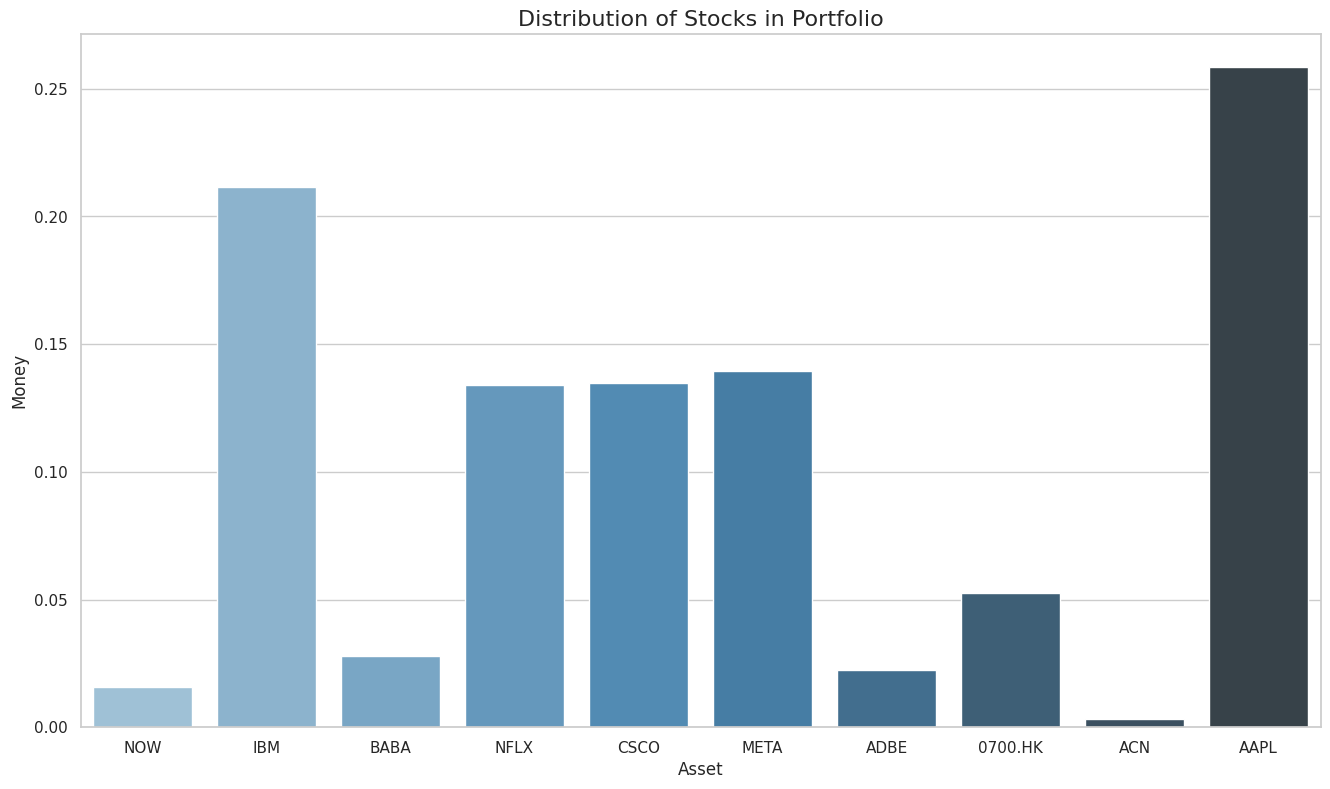


Markowitz optimal portfolio return is : 13.45% with volatility 0.20441948140125576


In [52]:
for weight, stock in zip(port_weights[ind],close_prices):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')

sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))
sns.barplot(x=selected_tickers, y=port_weights[ind], palette="Blues_d")
plt.title('Distribution of Stocks in Portfolio', fontsize=16)
plt.ylabel('Money', fontsize=12)
plt.xlabel('Asset', fontsize=12)
plt.show()

# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')


CALCULATE LOG_RETURN

In [48]:
log_ret= log_ret[1:].dropna()


LSTM

In [ ]:
train, test = log_ret[:int(0.8*len(log_ret))], log_ret[int(0.8*len(log_ret)):]

In [ ]:
train.shape, test.shape

((932, 10), (234, 10))

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [ ]:
# functions for training and evaluation - training DL.ipynb
# alternative to keras' TimeSeriesGenerator
def split_sequence(sequence, look_back, forecast_horizon):
    X, y = list(), list()
    for i in range(len(sequence)):
        lag_end = i + look_back
        forecast_end = lag_end + forecast_horizon
        if forecast_end > len(sequence):
            break
        seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
FORECAST_RANGE =1
LOOK_BACK = 30

In [ ]:
X_train, y_train = split_sequence(scaled_train, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
X_test, y_test = split_sequence(scaled_test, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
print('(Samples, time steps, features)')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(Samples, time steps, features)
(902, 30, 10)
(902, 1, 10)
(204, 30, 10)
(204, 1, 10)


In [ ]:
lstm = Sequential(name='LSTM')
lstm.add(LSTM(100, activation='relu', input_shape=(LOOK_BACK, 10)))
lstm.add(RepeatVector(FORECAST_RANGE))
lstm.add(LSTM(100, activation='relu', return_sequences=True))
lstm.add(TimeDistributed(Dense(10)))
lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          44,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 10)               │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,810 (491.45 KB)

 Trainable params: 125,810 (491.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

lstm.compile(optimizer='adam', loss='mse')

In [ ]:
history = lstm.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2109
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0108
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0068
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0080
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0072
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0066
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0065
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0065
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0068
Epoch 13/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0078
Epoch 14/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoch 15/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0069
Epoc

In [ ]:
predicted_returns = lstm.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


In [ ]:
predicted_returns.shape

(204, 1, 10)

optimal weigths: [0.00000000e+00 3.47804415e-01 0.00000000e+00 8.59732382e-02
 2.21361608e-01 4.69152496e-19 0.00000000e+00 2.12234230e-01
 5.83103485e-02 7.43161609e-02]


<ipython-input-30-11158206eb25>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_tickers, y=optimal_weights, palette="Blues_d")  # Grafico a barre


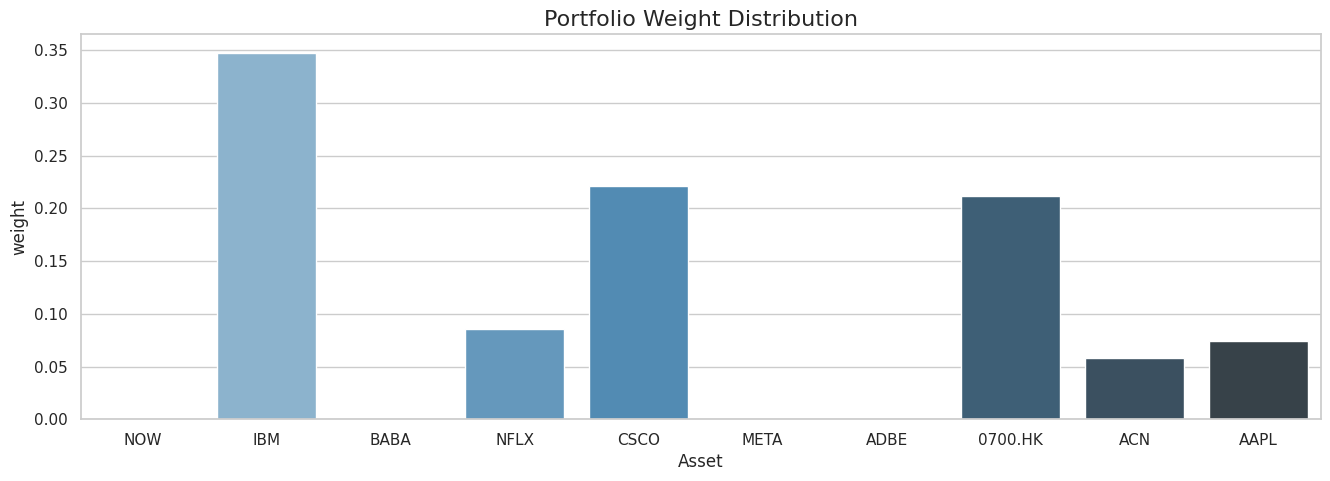

In [ ]:

def portfolio_performance(weights, expected_returns, covariance_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_return, portfolio_risk


def minimize_risk(weights):
    weights = np.array(weights)
    return portfolio_performance(weights, np.mean(predicted_returns, axis=0).flatten(), log_ret.cov())[1]

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(selected_tickers)))


initial_weights = [1. / len(selected_tickers)] * len(selected_tickers)
optimal = minimize(minimize_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimal.x
print("optimal weigths:", optimal_weights)
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))
sns.barplot(x=selected_tickers, y=optimal_weights, palette="Blues_d")
plt.title('Portfolio Weight Distribution', fontsize=16)
plt.ylabel('weight', fontsize=12)
plt.xlabel('Asset', fontsize=12)
plt.show()



In [55]:
optimal_return, optimal_risk = portfolio_performance(optimal_weights, np.mean(predicted_returns, axis=0).flatten(), log_ret.cov())
print(f"Expected Portfolio Return': {optimal_return*100}")
print(f"Portfolio Risk: {optimal_risk*100}")



Expected Portfolio Return': 53.42582865624844
Portfolio Risk: 1.309891868893508
